# Logistic Regression in Python

## Logistic Regression Assumptions

Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.
Keeping the above assumptions in mind, let’s look at our dataset.

## Data

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Now we can load our dataset with paths that where we save our data.

In [2]:
data = pd.read_csv('C:\\Users\\aruns\\Downloads\\My Proj\\Bank Marketing\\Dataset\\bank\\bank-full.csv',sep = ';')

In [3]:
data.shape

(45211, 17)

The dataset provides the bank customers’ information. It includes 45,211 records and 17 fields.

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


To check the Null values if any by the below code.

In [6]:
data.isnull().values.any()

False

## Input variables

age (numeric)

job : type of job (categorical: 'management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin.', 'services', 'self-employed','unemployed', 'housemaid', 'student')

marital : marital status (categorical: 'married', 'single', 'divorced')

education (categorical: 'tertiary', 'secondary', 'unknown', 'primary')

default: has credit in default? (categorical: 'no', 'yes')

housing: has housing loan? (categorical: 'yes', 'no')

loan: has personal loan? (categorical: 'yes', 'no')

contact: contact communication type (categorical: 'unknown', 'cellular', 'telephone')

month: last contact month of year (categorical: 'may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb','mar', 'apr', 'sep')

day: last contact day (categorical: 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31)

duration: last contact duration, in seconds (numeric). 
Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

## Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

## Data exploration

Let's check the predicting "y" variable to know how many peoble subscribed the term deposit or not

In [7]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

So totally 5289 people subscribed and 39922 people not subscribed from the total 45211.

Now just visualize the same above details using seaborn.

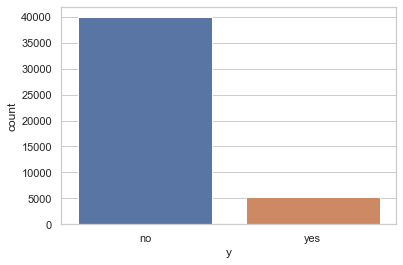

In [8]:
sns.countplot(x='y',data=data)
plt.savefig('count_plot')

Here you can notice that our predicting varible is defined as "yes" or "no" so we need to convert in "0" or "1" by the below code.

In [9]:
data['y']=np.where(data['y']=='yes','1',data['y'])
data['y']=np.where(data['y']=='no','0',data['y'])

In [10]:
data.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: object

To calculate the percentage of the no.of subscription and no.of non subscription details by the below code:

In [11]:
count_no_sub = len(data[data['y']=='0'])
count_sub = len(data[data['y']=='1'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of subscription is", pct_of_sub*100)

Percentage of no subscription is 88.30151954170445
Percentage of subscription is 11.698480458295547


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [12]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn’t.

The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.


In [13]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


In [14]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [15]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


By those above details we can't get the conclusion so let's visulize the above detail to get the clear picture.

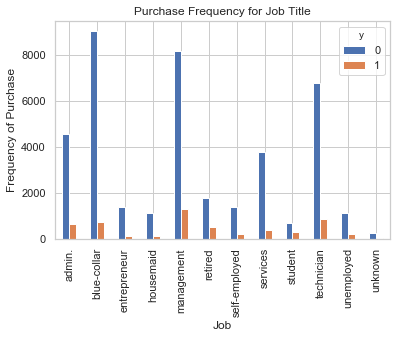

In [16]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

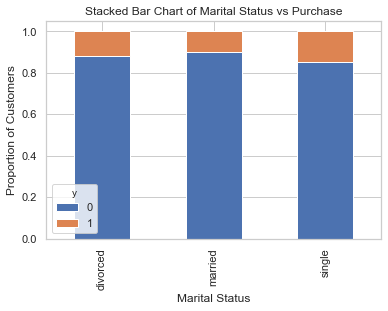

In [17]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

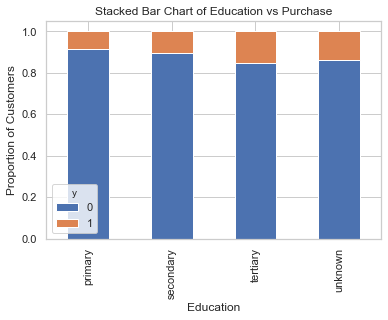

In [18]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

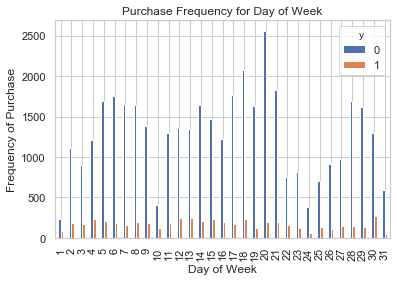

In [19]:
pd.crosstab(data.day,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

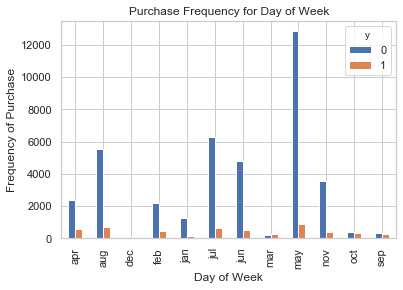

In [20]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

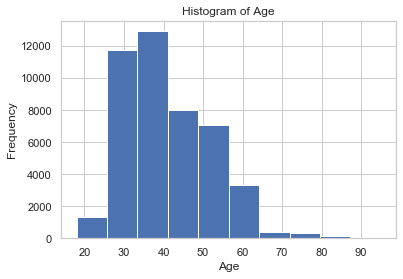

In [21]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

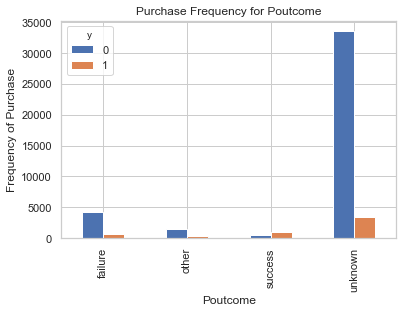

In [22]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

## Create dummy variables

That is variables with only two values, zero and one.

In [23]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Our final data columns will be:

In [24]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19',

## Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.

Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [25]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

!pip install imblearn
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  55906
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


## Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [26]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False  True  True  True  True  True False  True False False  True
 False False  True  True  True  True  True False  True  True False  True
  True  True  True False  True False False False False]
[59 62 60 57 61 58 27 21 20 22 26 31 25 23 30 24 29 28 18 17 19 13 14 16
 15 37 38 36 35 40 39 56 55 41 48 42 50 47 43 44 49 53 46 45 51 52 12  1
  9  8  1  1  1  1  1 11  1  7  6  1  2  3  1  1  1  1  1  4  1  1  5  1
  1  1  1 10  1 33 34 54 32]


C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [229]:
print(os_data_X.iloc[:,[47,50,51,52,52,54,56,59,62,63,64,65,66,68,69,71,72,73,74,76]])

       day_2  day_5  day_6  day_7  day_7  day_9  day_11  day_14  day_17  \
0          0      0      0      0      0      0       0       0       0   
1          0      0      0      0      0      0       0       0       0   
2          0      0      0      1      1      0       0       0       0   
3          0      0      0      0      0      0       0       0       1   
4          0      0      0      0      0      0       0       0       0   
...      ...    ...    ...    ...    ...    ...     ...     ...     ...   
55901      0      0      0      0      0      0       0       0       0   
55902      0      0      0      0      0      0       0       0       0   
55903      0      0      0      0      0      0       0       0       0   
55904      0      0      0      0      0      0       0       0       0   
55905      0      0      0      0      0      0       0       0       0   

       day_18  day_19  day_20  day_21  day_23  day_24  day_26  day_27  day_28  \
0           1     

#### The RFE has helped us select the following features: 

'day_3', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_12', 'day_15', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_24', 'day_25', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31'.

In [27]:
cols=['day_3', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_12', 'day_15', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_24', 'day_25', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31']
X=os_data_X[cols]
y=os_data_y['y']

## Implementing the model

In [28]:
logistic = LogisticRegression(random_state=100)
logistic.fit(X, y)
print("Train Score: ", logistic.score(X, y))
print("Test Score: ", logistic.score(X, y))

C:\Users\aruns\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Score:  0.7805244517583085
Test Score:  0.7805244517583085


In [29]:
y_predicted = logistic.predict(X)
y_actual = y

In [30]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_actual, y_predicted)
pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,18690,9263,27953
1,3007,24946,27953
All,21697,34209,55906


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print ('Accuracy Score :',accuracy_score(y_actual, y_predicted) )
print ('Report : ')
print (classification_report(y_actual, y_predicted))

Accuracy Score : 0.7805244517583085
Report : 
              precision    recall  f1-score   support

           0       0.86      0.67      0.75     27953
           1       0.73      0.89      0.80     27953

    accuracy                           0.78     55906
   macro avg       0.80      0.78      0.78     55906
weighted avg       0.80      0.78      0.78     55906



Interpretation: Of the entire test set, 78% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 78% of the customer’s preferred term deposits that were promoted.